**Imports**

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import plotly.express as plx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
from tensorflow import keras

**Data explore**

In [ ]:
data = pd.read_csv('/content/BankChurner.csv')
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [ ]:
data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',1)
data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 1)
data = data.drop('CLIENTNUM', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
cat_features = data.select_dtypes(['object','category']).columns.to_list()

for cat in cat_features:
    fig = plx.pie(data[cat].value_counts(False), values=cat, names = data[cat].value_counts(False).index,title = cat,template='ggplot2')
    fig.show()

In [ ]:
fig = plx.histogram(data, x="Credit_Limit", color="Attrition_Flag",title='Credit limit on the credit card')
fig.show()

**Correlation Matrix**

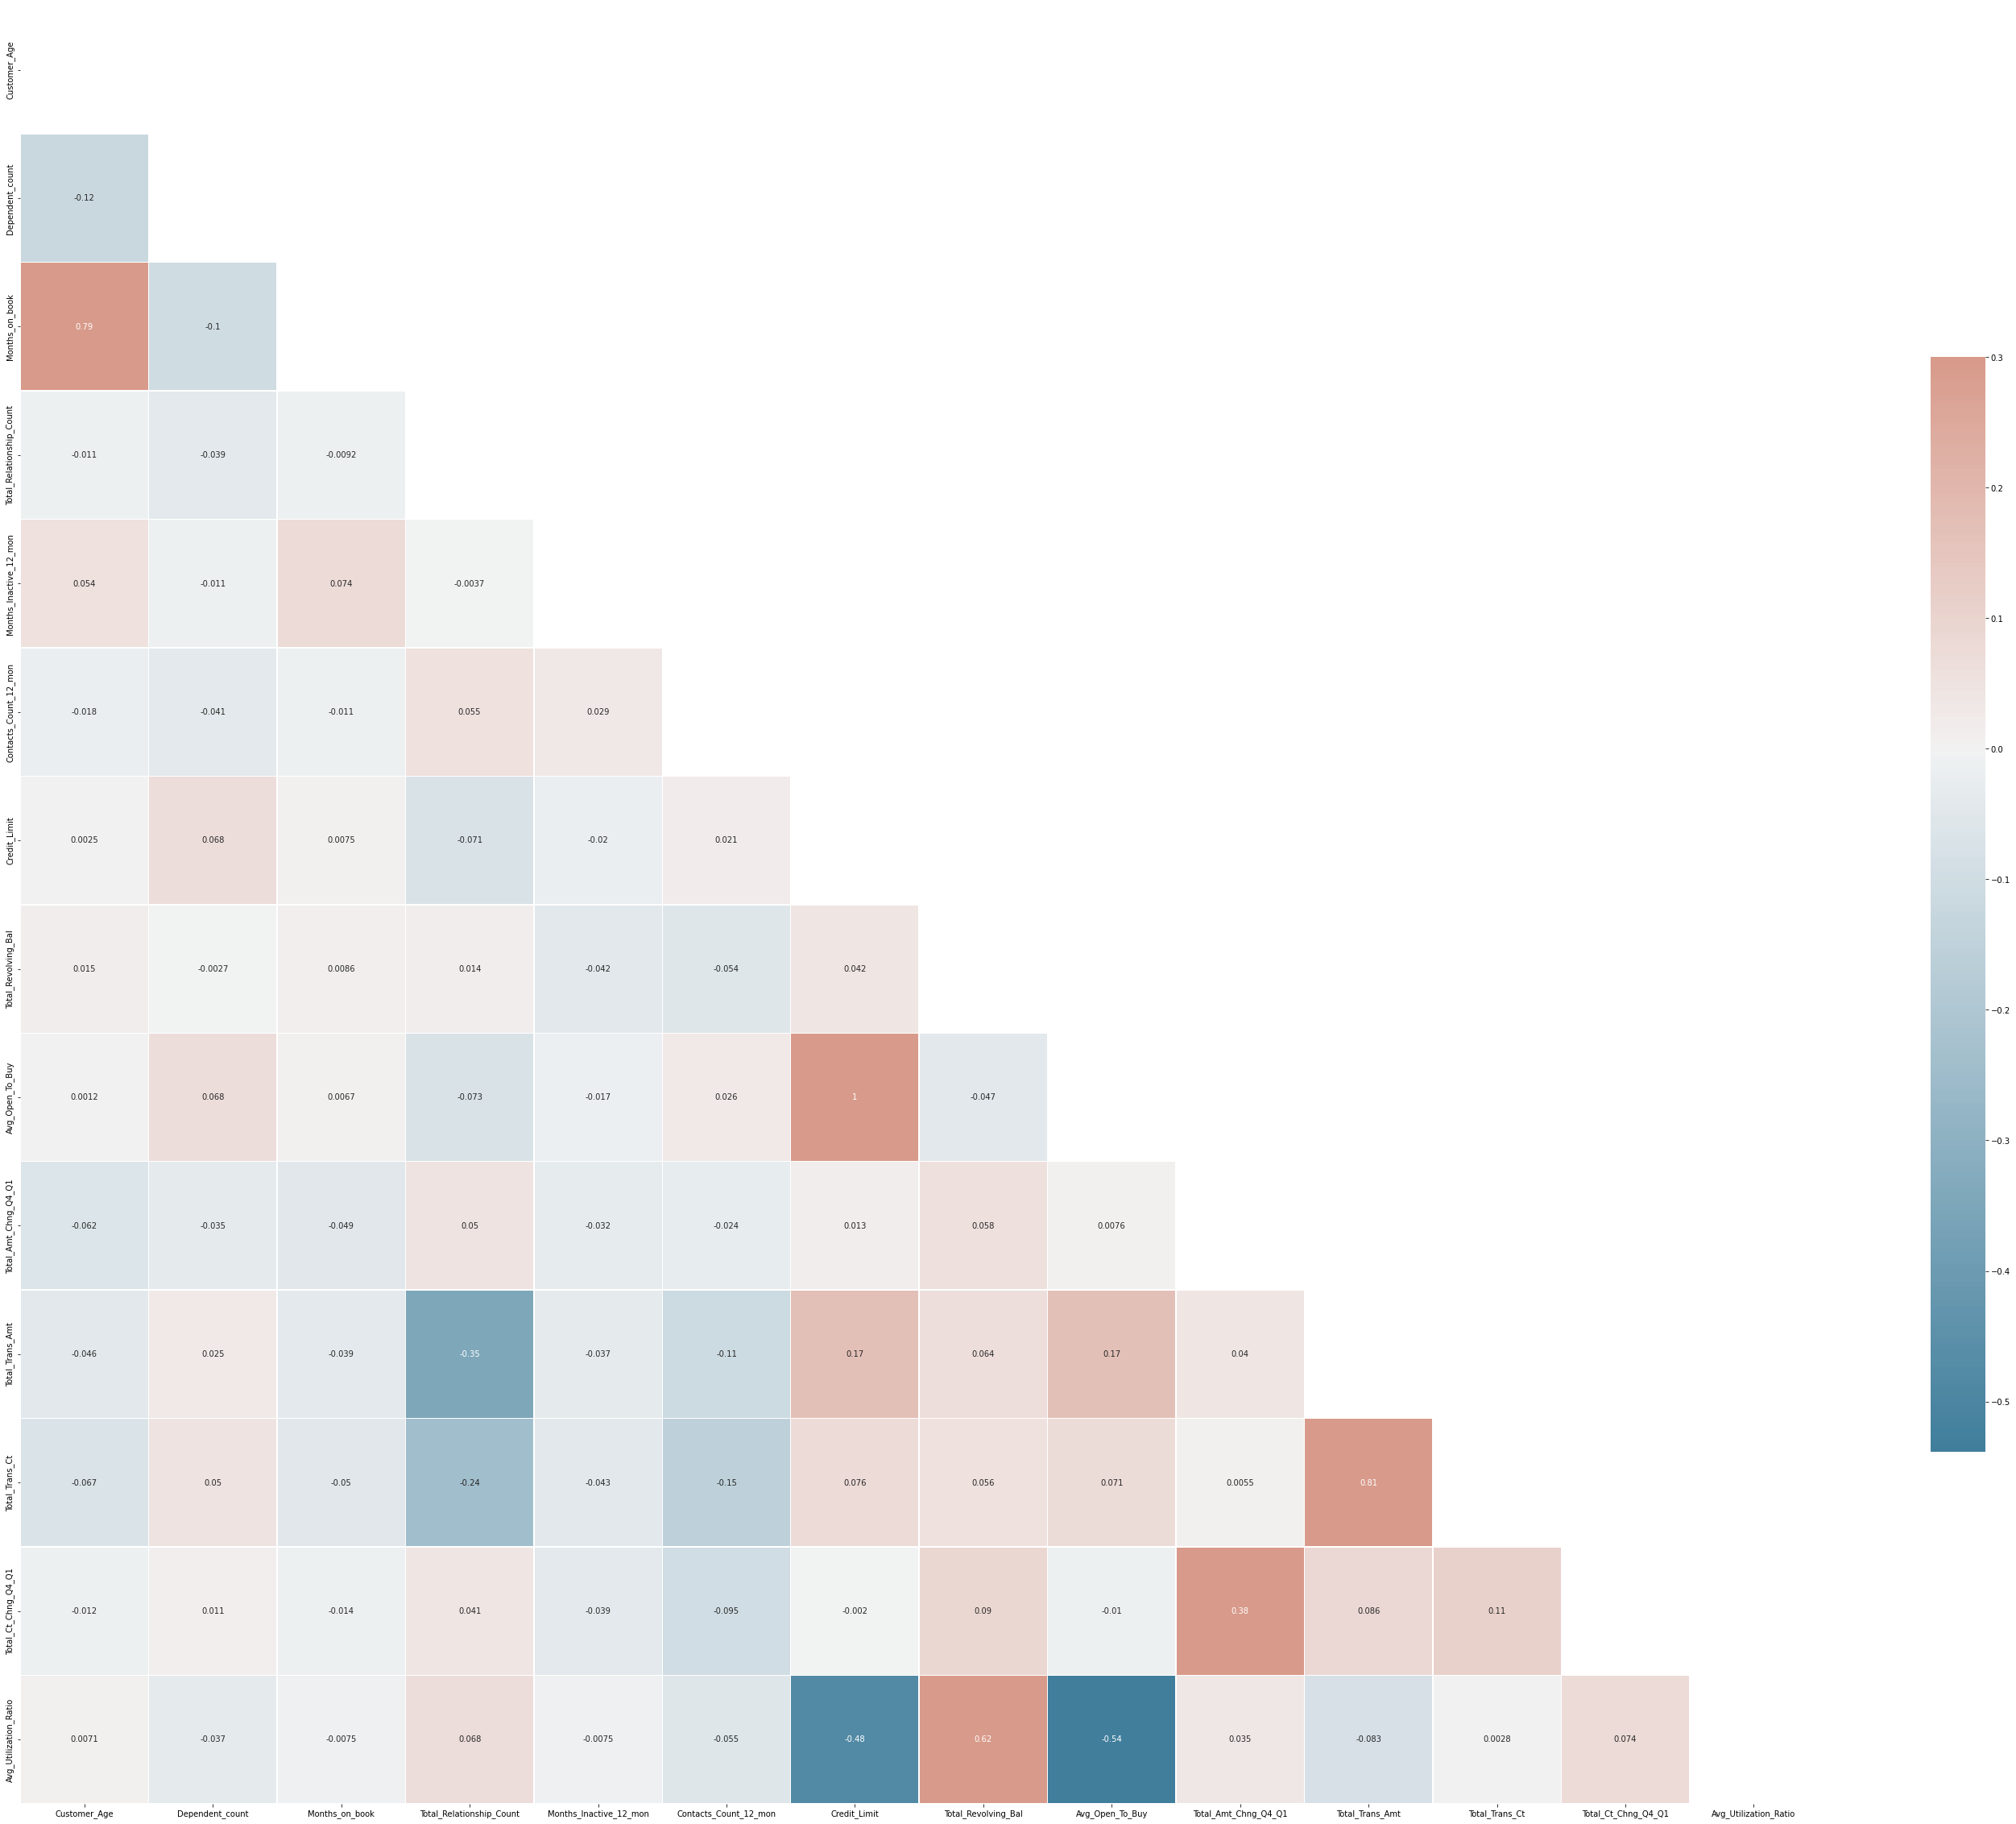

In [ ]:
def display_correlation_matrix(data):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(50, 50))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
       square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})
    
display_correlation_matrix(data)

**Data pre-process and categorical feature** 

In [ ]:
data_copy = data

data.info()
data_cat = data[cat_features]
data_cat

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [ ]:
a_map = {'Attrited Customer':1, 'Existing Customer':0}
data['Attrition_Flag'] = data['Attrition_Flag'].map(a_map)
g_map = {'M':0, 'F':1}
data['Gender'] = data['Gender'].map(g_map)
marital = OrdinalEncoder(categories=[['Unknown','Single','Married','Divorced']])
data['Marital_Status'] = marital.fit_transform(data_cat[['Marital_Status']])
edu = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College','Graduate','Post-Graduate','Doctorate']])
data['Education_Level'] = edu.fit_transform(data_cat[['Education_Level']])
income = OrdinalEncoder(categories=[['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']])
data['Income_Category'] = income.fit_transform(data_cat[['Income_Category']])
card = OrdinalEncoder(categories=[['Blue', 'Silver','Gold','Platinum']])
data['Card_Category'] = card.fit_transform(data_cat[['Card_Category']])
data[cat_features]

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0,0,2.0,2.0,3.0,0.0
1,0,1,4.0,1.0,1.0,0.0
2,0,0,4.0,2.0,4.0,0.0
3,0,1,2.0,0.0,1.0,0.0
4,0,0,1.0,2.0,3.0,0.0
...,...,...,...,...,...,...
10122,0,0,4.0,1.0,2.0,0.0
10123,1,0,0.0,3.0,2.0,0.0
10124,1,1,2.0,2.0,1.0,0.0
10125,1,0,4.0,0.0,2.0,0.0


**Scaling**

In [ ]:
cont = data.select_dtypes(['float64','int64','category']).columns.to_list()
data_cont = data[cont]
data_cont

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2.0,2.0,3.0,0.0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,4.0,1.0,1.0,0.0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,4.0,2.0,4.0,0.0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,2.0,0.0,1.0,0.0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,1.0,2.0,3.0,0.0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,4.0,1.0,2.0,0.0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,0,2,0.0,3.0,2.0,0.0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,1,2.0,2.0,1.0,0.0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,0,2,4.0,0.0,2.0,0.0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
credit = StandardScaler()
data['Credit_Limit'] = credit.fit_transform(data_cont[['Credit_Limit']])
revolv_bal = StandardScaler()
data['Total_Revolving_Bal'] = revolv_bal.fit_transform(data_cont[['Total_Revolving_Bal']])
avg_open = StandardScaler()
data['Avg_Open_To_Buy'] = avg_open.fit_transform(data_cont[['Avg_Open_To_Buy']])
trans = StandardScaler()
data['Total_Trans_Amt'] = trans.fit_transform(data_cont[['Total_Trans_Amt']])


#function for easier access of all our previous code for easier ml model run
def preprocessCustomersPipeline(data):

    data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',1)
    data = data.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 1)
    data = data.drop('CLIENTNUM', 1)
    
    #Categorical
    a_map = {'Attrited Customer':1, 'Existing Customer':0}
    data['Attrition_Flag'] = data['Attrition_Flag'].map(a_map)
    g_map = {'M':0, 'F':1}
    data['Gender'] = data['Gender'].map(g_map)
    
    marital = OrdinalEncoder(categories=[['Unknown','Single','Married','Divorced']])
    data['Marital_Status'] = marital.fit_transform(data[['Marital_Status']])

    edu = OrdinalEncoder(categories=[['Unknown', 'Uneducated', 'High School', 'College','Graduate', 'Post-Graduate','Doctorate']])
    data['Education_Level'] = edu.fit_transform(data[['Education_Level']])

    income = OrdinalEncoder(categories=[['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']])
    data['Income_Category'] = income.fit_transform(data[['Income_Category']])

    card = OrdinalEncoder(categories=[['Blue', 'Silver','Gold','Platinum']])
    data['Card_Category'] = card.fit_transform(data[['Card_Category']])
    
    #Numerical
    credit = StandardScaler()
    data['Credit_Limit'] = credit.fit_transform(data[['Credit_Limit']])
    revolv_bal = StandardScaler()
    data['Total_Revolving_Bal'] = revolv_bal.fit_transform(data[['Total_Revolving_Bal']])
    avg_open = StandardScaler()
    data['Avg_Open_To_Buy'] = avg_open.fit_transform(data[['Avg_Open_To_Buy']])
    trans = StandardScaler()
    data['Total_Trans_Amt'] = trans.fit_transform(data[['Total_Trans_Amt']])
    
    nums = ['Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt', 'Total_Trans_Ct']
    for n in nums:
        s = StandardScaler()
        data[n] = s.fit_transform(data[[n]])
    return data


Testing predictions of ai algos before running neural nets

In [ ]:
data_raw = pd.read_csv('/content/BankChurner.csv')
data_raw_shuffled = data_raw.sample(frac=1)


train = data_raw_shuffled.iloc[2025:,:]
test = data_raw_shuffled.iloc[:2025,:]

y_train, X_train = preprocessCustomersPipeline(train)
y_test, X_test = preprocessCustomersPipeline(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local

In [ ]:
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC()

ml_models = [rf,knn,svc]
for ml in ml_models:
    ml.fit(X_train, y_train)
    y_pred = ml.predict(X_test)
    print(accuracy_score(y_pred,y_test))

0.9550617283950618
0.8666666666666667
0.8375308641975309


**The neural model**

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(19,input_shape=X_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(7, activation="elu", kernel_initializer="LecunNormal"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation="relu",  kernel_initializer="he_normal")
])
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.Nadam(learning_rate=0.001),metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
254/254 [==============================] - 2s 3ms/step - loss: 1.4541 - accuracy: 0.6712 - val_loss: 0.7727 - val_accuracy: 0.8138
Epoch 2/50
254/254 [==============================] - 1s 3ms/step - loss: 0.9641 - accuracy: 0.7829 - val_loss: 0.7165 - val_accuracy: 0.7886
Epoch 3/50
254/254 [==============================] - 1s 3ms/step - loss: 0.8649 - accuracy: 0.7944 - val_loss: 0.8701 - val_accuracy: 0.8375
Epoch 4/50
254/254 [==============================] - 1s 3ms/step - loss: 0.8536 - accuracy: 0.8214 - val_loss: 0.8451 - val_accuracy: 0.8375
Epoch 5/50
254/254 [==============================] - 1s 3ms/step - loss: 0.7741 - accuracy: 0.8303 - val_loss: 0.6761 - val_accuracy: 0.8410
Epoch 6/50
254/254 [==============================] - 1s 3ms/step - loss: 0.7463 - accuracy: 0.8324 - val_loss: 0.6728 - val_accuracy: 0.8385
Epoch 7/50
254/254 [==============================] - 1s 2ms/step - loss: 0.7508 - accuracy: 0.8329 - val_loss: 0.7087 - val_accuracy: 0.8380
Epoch 

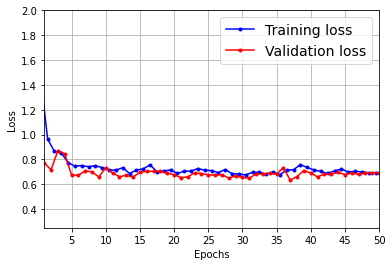

In [ ]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.axis([1, 50, 0.25, 2])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()


In [ ]:
class RUG(BaseEstimator, ClassifierMixin):
    def __init__(self, demo_param='demo'):
         self.demo_param = demo_param

    def fit(self, X, y):
        return self

    def predict(self, X):
        return model.predict(X)
    
    def predict_proba (self, X):
        return model.predict(X)
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(probability=True)
rug = RUG()

voting_clf = VotingClassifier(estimators=[('rf',rf), ('knn', knn), ('svc',svc),('xgb',xgb), ('rug', rug)], voting="soft", weights=[1,0.2,0.2,1,0.6])
voting_clf.fit(X_train, y_train)
pred = voting_clf.predict(X_test)
print(accuracy_score(pred, y_test))


0.9580246913580247
